# HW1

## Q1

We want to find the probability that a student will pass the class **given** they answer the question quickly, i.e., 
$
\Pr(\text{pass} \mid \text{quick}).
$

**Given data**:
- $\Pr(\text{pass}) = 0.9$. Thus, $\Pr(\text{not pass}) = 0.1$.
- $\Pr(\text{quick} \mid \text{pass}) = 0.6$.
- $\Pr(\text{quick} \mid \text{not pass}) = 0.3$.

---

### Step 1: Compute $\Pr(\text{quick})$

Using the law of total probability,

$
\Pr(\text{quick})
= \Pr(\text{quick} \mid \text{pass}) \,\Pr(\text{pass})
  \;+\; \Pr(\text{quick} \mid \text{not pass}) \,\Pr(\text{not pass}).
$

Substitute the numbers:

$
\Pr(\text{quick})
= (0.6)\,(0.9) \;+\; (0.3)\,(0.1)
= 0.54 \;+\; 0.03
= 0.57.
$

---

### Step 2: Apply Bayes’ Theorem

$
\Pr(\text{pass} \mid \text{quick})
= \frac{\Pr(\text{quick} \mid \text{pass})\,\Pr(\text{pass})}{\Pr(\text{quick})}
= \frac{(0.6)\,(0.9)}{0.57}
= \frac{0.54}{0.57}
\approx 0.9474.
$

---

### Conclusion

Thus, approximately **94.74%** of the students who answer the question quickly will pass the class.


In [1]:
import math

p_pass = 0.9
p_not_pass = 1 - p_pass
p_quick_given_pass = 0.6
p_quick_given_not_pass = 0.3

p_quick = p_quick_given_pass * p_pass + p_quick_given_not_pass * p_not_pass
p_pass_given_quick = (p_quick_given_pass * p_pass) / p_quick
print(p_pass_given_quick)


0.9473684210526315


## Q2

We have a Multinomial likelihood $ p(x \mid \theta, n) $

with $K$ categories and \(n\) trials, and a Dirichlet prior
$
  p(\theta \mid \alpha) 
$
with parameters 
$\alpha = (\alpha_1, \alpha_2, \ldots, \alpha_K)$.

#### By Bayes' theorem,

$
p(\theta \mid x, n, \alpha)
= \frac{p(x \mid \theta,n)\,p(\theta \mid \alpha)}{p(x)}
\;\propto\;
p(x \mid \theta,n)\,p(\theta \mid \alpha).
$

Since the Dirichlet distribution is the **conjugate prior** for the Multinomial, multiplying by the Multinomial likelihood **preserves** the Dirichlet form. Consequently, the **posterior distribution**

$
p(\theta \mid x, n, \alpha)
$

is also a **Dirichlet distribution**. Its parameters are obtained by **adding** the observed Multinomial counts 
$\mathbf{x} = (x_1, \ldots, x_K)$
to the prior parameters $\alpha$. Formally,

$
p(\theta \mid x, n, \alpha)
= \mathrm{Dirichlet}\bigl(\alpha_1 + x_1,\; \alpha_2 + x_2,\;\ldots,\;\alpha_K + x_K\bigr).
$

Hence, the answer is:

1. **Posterior distribution**: Dirichlet.
2. **Posterior parameters**: 
   $\alpha + \mathbf{x} 
   = (\alpha_1 + x_1,\; \alpha_2 + x_2,\;\ldots,\;\alpha_K + x_K)$.


## Q3

### We want to:

1. **Draw a sample** from a 3-category multinomial distribution.
2. **Visualize** the multinomial distribution and the sampled counts.
3. **Specify a Dirichlet prior** and visualize it (in the 2-simplex, i.e., a ternary plot).
4. **Update the posterior** using the observed sample and visualize the posterior Dirichlet distribution in the same ternary plot.

Let's assume we have a multinomial parameter 
$$
p = (0.2,\;0.3,\;0.5),
$$
and we conduct 
$$n = 100$$ 
trials. Then we sample from the multinomial:
$$
\mathbf{x} = (x_1,x_2,x_3), \quad \text{where } \sum_{i=1}^3 x_i = n.
$$

We also choose a Dirichlet prior 
$$
\alpha = (\alpha_1,\alpha_2,\alpha_3).
$$


Observed counts: [19 32 49]


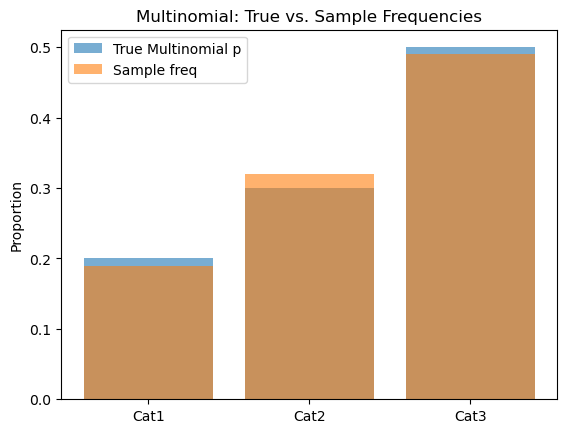

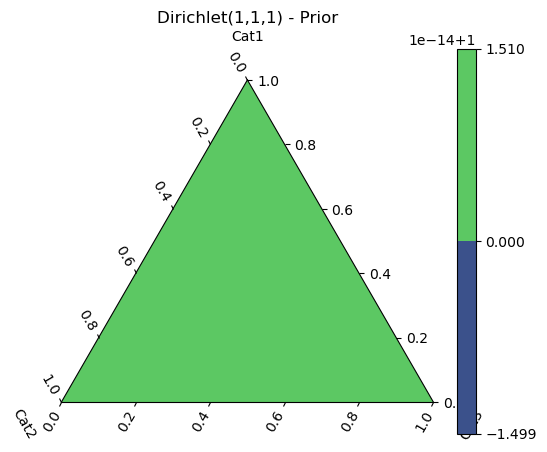

Posterior alpha = [20. 33. 50.]


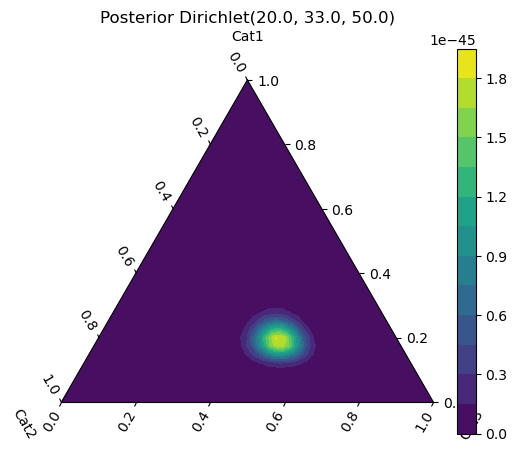

In [4]:
# This code is purely illustrative. 
# Copy it into a separate Code Cell to run.

import numpy as np
import matplotlib.pyplot as plt

# For ternary plots, we can install mpltern (if not already installed):
!pip install mpltern

import mpltern

# 1) Sampling from a 3-category multinomial
np.random.seed(42)  # Reproducibility
p = [0.2, 0.3, 0.5]  # true multinomial parameters
n = 100
x = np.random.multinomial(n, p)
print("Observed counts:", x)

# 2) Visualize the distribution and the sample
categories = ['Cat1','Cat2','Cat3']
plt.bar(categories, p, alpha=0.6, label='True Multinomial p')
plt.bar(categories, x/n, alpha=0.6, label='Sample freq')
plt.title("Multinomial: True vs. Sample Frequencies")
plt.ylabel("Proportion")
plt.legend()
plt.show()

# 3) Specify a Dirichlet prior
alpha_prior = np.array([1.0, 1.0, 1.0])  # A uniform prior

# 4) Ternary plot for the prior
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='ternary', ternary_sum=1.0)
ax.set_tlabel("Cat1")
ax.set_llabel("Cat2")
ax.set_rlabel("Cat3")
ax.set_title("Dirichlet(1,1,1) - Prior")

# Generate a grid of points in the 2-simplex
N = 40
pts = []
vals = []
for i in range(N+1):
    for j in range(N+1-i):
        k = N - i - j
        s1 = i / N
        s2 = j / N
        s3 = k / N
        pts.append([s1, s2, s3])
        # Unnormalized Dirichlet density: s1^(alpha1-1)*s2^(alpha2-1)*s3^(alpha3-1)
        val = (s1**(alpha_prior[0]-1) *
               s2**(alpha_prior[1]-1) *
               s3**(alpha_prior[2]-1))
        vals.append(val)

pts = np.array(pts)
vals = np.array(vals)

im = ax.tricontourf(pts[:,0], pts[:,1], pts[:,2], vals, levels=15, cmap='viridis')
fig.colorbar(im, ax=ax)
plt.show()

# 5) Update posterior
x1, x2, x3 = x
alpha_posterior = alpha_prior + x
print("Posterior alpha =", alpha_posterior)

# 6) Ternary plot for the posterior
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='ternary', ternary_sum=1.0)
ax.set_tlabel("Cat1")
ax.set_llabel("Cat2")
ax.set_rlabel("Cat3")
ax.set_title(f"Posterior Dirichlet({alpha_posterior[0]}, {alpha_posterior[1]}, {alpha_posterior[2]})")

pts2 = []
vals2 = []
for i in range(N+1):
    for j in range(N+1-i):
        k = N - i - j
        s1 = i / N
        s2 = j / N
        s3 = k / N
        pts2.append([s1, s2, s3])
        val2 = (s1**(alpha_posterior[0]-1) *
                s2**(alpha_posterior[1]-1) *
                s3**(alpha_posterior[2]-1))
        vals2.append(val2)

pts2 = np.array(pts2)
vals2 = np.array(vals2)

im2 = ax.tricontourf(pts2[:,0], pts2[:,1], pts2[:,2], vals2, levels=15, cmap='viridis')
fig.colorbar(im2, ax=ax)
plt.show()